<a href="https://colab.research.google.com/github/davialvesguerra/trainee-iee/blob/main/3%C2%BA_Per%C3%ADodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
df = pd.read_csv('gdrive/My Drive/iee/3º Período/winequality.csv')

In [3]:
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,0
6493,6493,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
6494,6494,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
6495,6495,7.0,0.30,0.28,2.2,0.042,21.0,177.0,0.99166,3.20,0.57,11.4,5,0


In [4]:
cols_num = df.iloc[:,range(1,13)]
cols_num

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6
6493,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6
6494,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
6495,7.0,0.30,0.28,2.2,0.042,21.0,177.0,0.99166,3.20,0.57,11.4,5


In [5]:
start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.0009479522705078125


In [6]:
start = time.time()
for i in range(0,1800):
  X_train.to_numpy()-X_test[i,:]
end = time.time()
print(end - start)

NameError: ignored

In [ ]:
start = time.time()
for i in range(0,1800):
  np.subtract(X_train.to_numpy(), X_test[i,:])
end = time.time()
print(end - start)

0.532867431640625


In [7]:
def knn(X_test, X_train, y_train, k):

  nrow = X_test.shape[0]
  y_pred = np.empty(nrow)

  for i in range(nrow):

    x_test = X_test[i,:]

    ind = X_train.index
    X_process = X_train - x_test
    X_process = X_process**2

    X_process = np.sqrt(np.sum(X_process, axis=1))

    result = np.column_stack([ind,X_process])

    result = result[result[:,1].argsort()]

    result = y_train[result[:k,0]]

    y_pred[i] = np.argmax(np.bincount(result))
    
  return y_pred


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

In [22]:
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,13]]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = X_test.to_numpy() 

start_time = time.time()
y_pred = knn(X_test, X_train, y_train, k=3)
end_time = time.time()

end_time - start_time

11.312159299850464

In [23]:
conf_matrix = confusion_matrix( y_pred, y_test)

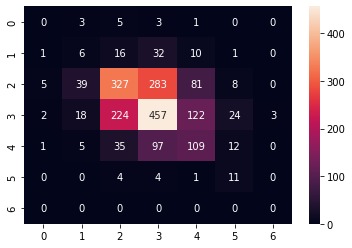

In [24]:
sns.heatmap(conf_matrix, annot=True,  fmt='g')

In [ ]:
def cont_unique(vetor):
  dic = {}

  for value in vetor:
    if str(value) not in list(dic.keys()):
      dic[str(value)] = 1

    else: 
      dic[str(value)] += 1


  return dic

In [ ]:
cont_unique(df['quality'])

{'3': 30, '4': 216, '5': 2138, '6': 2836, '7': 1079, '8': 193, '9': 5}

In [ ]:
def knn(x_test, X_train, y_train, k):

  tam = X_test.shape[0]


  result = np.empty((tam,2))

  for line in range(tam):

    linha = X_train.iloc[line,:]

    #result[line,0] = line
    result[line,1] = calcDistEuclid(linha, x_test)

  #result = result[result[:,1].argsort()]

  #result_k = result[0:k,:]
  
  #b = y_train.iloc[result_k[:,0]]

  #counts = np.bincount(b)
  #counts = np.argmax(counts)

  return result